<center><h1>In the name of Allah</h1><center>

**Import the required tools**

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**Load data: Important columns were selected**

In [11]:
df = pd.read_csv("Hotel Bookings.csv")
df = df.drop_duplicates()

hotel_df = df[['hotel','is_canceled','arrival_date_year','arrival_date_month',\
               'arrival_date_day_of_month','adr','market_segment','distribution_channel','lead_time',\
                'required_car_parking_spaces','country','adults','children','babies','meal']]
hotel_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 87396 entries, 0 to 119389
Data columns (total 15 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   hotel                        87396 non-null  object 
 1   is_canceled                  87396 non-null  int64  
 2   arrival_date_year            87396 non-null  int64  
 3   arrival_date_month           87396 non-null  object 
 4   arrival_date_day_of_month    87396 non-null  int64  
 5   adr                          87396 non-null  float64
 6   market_segment               87396 non-null  object 
 7   distribution_channel         87396 non-null  object 
 8   lead_time                    87396 non-null  int64  
 9   required_car_parking_spaces  87396 non-null  int64  
 10  country                      86944 non-null  object 
 11  adults                       87396 non-null  int64  
 12  children                     87392 non-null  float64
 13  babies              

**Check for columns that may contain invalid values**

In [12]:
print(hotel_df['meal'].unique())
print(hotel_df['market_segment'].unique())
print(hotel_df['distribution_channel'].unique())

['BB' 'FB' 'HB' 'SC' 'Undefined']
['Direct' 'Corporate' 'Online TA' 'Offline TA/TO' 'Complementary' 'Groups'
 'Undefined' 'Aviation']
['Direct' 'Corporate' 'TA/TO' 'Undefined' 'GDS']


According to the obtained results, the `market_segment`, `distribution_channel` and `meal` columns have invalid values that are defined as **Undefined**. Therefore, in the first step, it is better to change these values to **nan**.

In [13]:
hotel_df['market_segment'].replace('Undefined', np.nan, inplace=True)
hotel_df['distribution_channel'].replace('Undefined', np.nan, inplace=True)
hotel_df['meal'].replace('Undefined', np.nan, inplace=True)

C:\Users\Mohammad\AppData\Local\Temp\ipykernel_15516\2603505883.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  hotel_df['market_segment'].replace('Undefined', np.nan, inplace=True)
C:\Users\Mohammad\AppData\Local\Temp\ipykernel_15516\2603505883.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hotel_df['market_segment'].replace('Undefin

Covert data-types and data cleaning

In [14]:
hotel_df.dropna(inplace=True)

hotel_df['hotel'] = hotel_df.loc[:, 'hotel'].astype('category')
hotel_df['country'] = hotel_df.loc[:,'country'].astype('category')
hotel_df['market_segment'] = hotel_df.loc[:,'market_segment'].astype('category')
hotel_df['distribution_channel'] = hotel_df.loc[:,'distribution_channel'].astype('category')
hotel_df['meal'] = hotel_df.loc[:,'meal'].astype('category')
hotel_df['arrival_date_month'] = hotel_df.loc[:,'arrival_date_month'].astype('category')
hotel_df['is_canceled'] = hotel_df.loc[:,'is_canceled'].astype(np.bool_)
hotel_df['required_car_parking_spaces'] = hotel_df.loc[:, 'required_car_parking_spaces'].astype(np.bool_)
hotel_df[['arrival_date_year','adults','children','babies','arrival_date_day_of_month']] =\
      hotel_df[['arrival_date_year','adults','children','babies','arrival_date_day_of_month']].astype(np.int64)

hotel_df.info()

C:\Users\Mohammad\AppData\Local\Temp\ipykernel_15516\387756803.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hotel_df.dropna(inplace=True)
C:\Users\Mohammad\AppData\Local\Temp\ipykernel_15516\387756803.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hotel_df['hotel'] = hotel_df.loc[:, 'hotel'].astype('category')
C:\Users\Mohammad\AppData\Local\Temp\ipykernel_15516\387756803.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docu

<class 'pandas.core.frame.DataFrame'>
Index: 86451 entries, 0 to 119389
Data columns (total 15 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   hotel                        86451 non-null  category
 1   is_canceled                  86451 non-null  bool    
 2   arrival_date_year            86451 non-null  int64   
 3   arrival_date_month           86451 non-null  category
 4   arrival_date_day_of_month    86451 non-null  int64   
 5   adr                          86451 non-null  float64 
 6   market_segment               86451 non-null  category
 7   distribution_channel         86451 non-null  category
 8   lead_time                    86451 non-null  int64   
 9   required_car_parking_spaces  86451 non-null  bool    
 10  country                      86451 non-null  category
 11  adults                       86451 non-null  int64   
 12  children                     86451 non-null  int64   
 13  babie

By converting the data into its appropriate types, a smaller amount of memory was occupied than in its initial state

<h3><font color='yellow'>Q1: There are two types of hotels in the dataset, which type of hotels booked most? Plot a pie chart to show the results.</font></h3>

<ul>
<h3>Definitions:</h3>
<li><b>City Hotel (Downtown Hotel or Commercial hotel)</b>: This type of hotel is situated on the heart of the city within a short approachable distance from shopping areas, theater, super market etc. The guests are general businessmen who come for business purpose for 1 to 2 days.</li>


<li><b>Resort Hotel</b>: They are situated near hill station, sea beaches, wild life sanctuary of forest, pilgrimage centers etc. the guests are generally holiday makers and their duration of stay extend from week to fort night. Resort hotels are generally spread over a large area. This hotel provides recreational facilities.</li>
</ul>

hotel
City Hotel      53418
Resort Hotel    33033
Name: count, dtype: int64

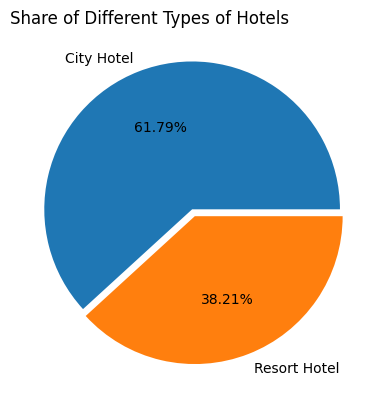

In [15]:
hotel_count = hotel_df['hotel'].value_counts()
n_total = np.sum(hotel_count)
plt.figure()
plt.pie(hotel_count.values, labels=hotel_count.index,
        explode=[0.05, 0], autopct='%1.2f%%')
plt.title('Share of Different Types of Hotels', loc='left')
hotel_count

As can be seen in the above graph, more than 60% of the dataset is made up of City Hotels. Many people prefer to stay in hotels that are located in close proximity to city centers and tourist attractions. City hotels are favored for their central location and easy access to important city landmarks.  City hotels typically offer more amenities and services compared to hotels outside the city. These facilities may include a variety of restaurants, swimming pools, fitness centers, free Wi-Fi, and room services such as room service and concierge services.

<h3><font color='yellow'>Q2: What percentage of bookings were cancelled? What type of chart do you suggest to show the results?</font></h3>

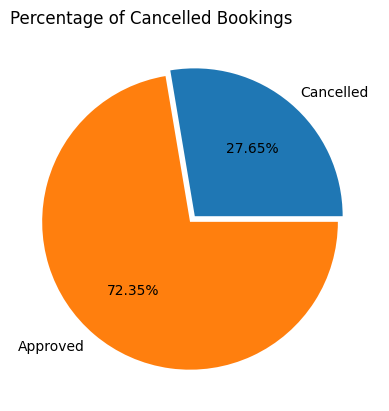

In [16]:
n_cancelled = hotel_df['is_canceled'].sum()

plt.figure()
plt.pie([n_cancelled, hotel_df['is_canceled'].size - n_cancelled],
        labels=['Cancelled', 'Approved'], explode=[0, 0.05], autopct='%1.2f%%')
plt.title('Percentage of Cancelled Bookings', loc='left');

According to the above chart, more than 27% of hotel reservations have been canceled.

<h3><font color='yellow'>Q3: Based on different hotel types, what percentage of bookings were cancelled? What type of chart do you suggest to show the results?</font></h3>

C:\Users\Mohammad\AppData\Local\Temp\ipykernel_15516\2297547437.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  hotel_canaled = hotel_df.groupby('hotel')['is_canceled'].sum() / hotel_df['hotel'].value_counts()


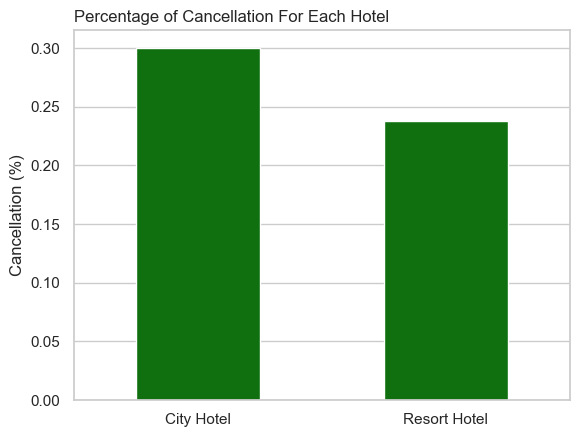

In [17]:
hotel_canaled = hotel_df.groupby('hotel')['is_canceled'].sum() / hotel_df['hotel'].value_counts()

plt.figure()
sns.set_theme(style="whitegrid", color_codes=True)
sns.barplot(hotel_canaled, width=0.5,color='green')
plt.ylabel('Cancellation (%)')
plt.xlabel('')
plt.title('Percentage of Cancellation For Each Hotel', loc='left');

Most of the cancellations of hotel reservations are related to City Hotels. It is important to note that most of the hotel reservations are related to these types of hotels.

<h3><font color='yellow'>Q4: In different years, what type of hotels were booked most and booked least? Draw a proper countplot to show the results.</font></h3>

C:\Users\Mohammad\AppData\Local\Temp\ipykernel_15516\2065426955.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  result = hotel_df.groupby(['arrival_date_year','hotel'])['arrival_date_month'].count().reset_index()


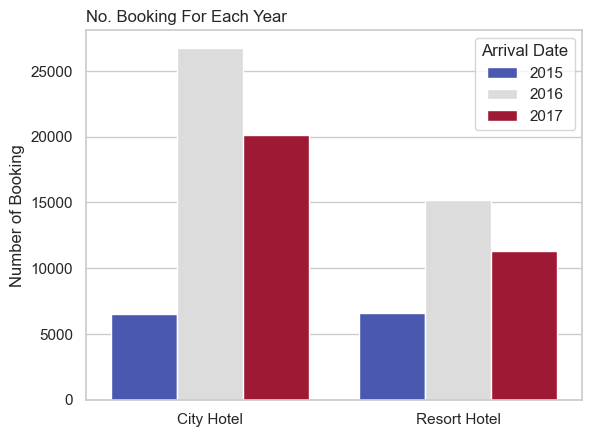

In [18]:
result = hotel_df.groupby(['arrival_date_year','hotel'])['arrival_date_month'].count().reset_index()
result.rename(columns={'arrival_date_month':'n_booked'},inplace=True)

plt.figure()
sns.set_theme(style="whitegrid", color_codes=True)
sns.barplot(x=result['hotel'],y=result['n_booked'],hue=result['arrival_date_year'],palette='coolwarm');
plt.ylabel('Number of Booking');
plt.xlabel('');
plt.legend(title="Arrival Date")
plt.title('No. Booking For Each Year',loc='left');

In 2015, the number of reservations for City Hotel and Resort Hotel is almost equal. Despite the increase in the number of reservations in 2016 and 2017 for both types of hotels, the increase in the number of reservations for City Hotel has been much higher than Resort Hotel. For both types of hotels, the number of reservations in 2017 has dropped significantly compared to last year.

<h3><font color='yellow'>Q5: According to different hotel types, how ‘adr’ changes in different months?</font></h3>

<ul>
<h3>Definitions:</h3>
<li><b>Average Daily Rate (ADR)</b>: The average daily rate (ADR) is a metric widely used in the hospitality industry to indicate the average revenue earned for an occupied room on a given day. The average daily rate is one of the key performance indicators (KPI) of the industry.</li>
</ul>
<center>

$ADR =  \dfrac {Rooms Revenue Earned} {Number of Rooms Sold} $

</center>

In [19]:
hotel_df['adr'].agg(['min','max'])

min      -6.38
max    5400.00
Name: adr, dtype: float64

By considering the above result, the minimum ADR (Average Daily Rate) value for Resort Hotel is a negative number.
ADR cannot be negative in the hotel industry. Since ADR is a measure of the average rate charged per room, it cannot be negative. However, it can be low or below expectations, which may indicate challenges or issues in the hotel's pricing strategy, demand, or market conditions. Hotels typically strive to increase their ADR to maximize revenue and profitability.

Set negative number of ADR equal to zero:

In [20]:
hotel_df['adr'] = hotel_df['adr'].apply(lambda x: x if x >= 0 else 0)

C:\Users\Mohammad\AppData\Local\Temp\ipykernel_15516\2213014973.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hotel_df['adr'] = hotel_df['adr'].apply(lambda x: x if x >= 0 else 0)


C:\Users\Mohammad\AppData\Local\Temp\ipykernel_15516\3334828975.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  result = hotel_df.groupby(['hotel','arrival_date_month'])['adr'].mean().reset_index()


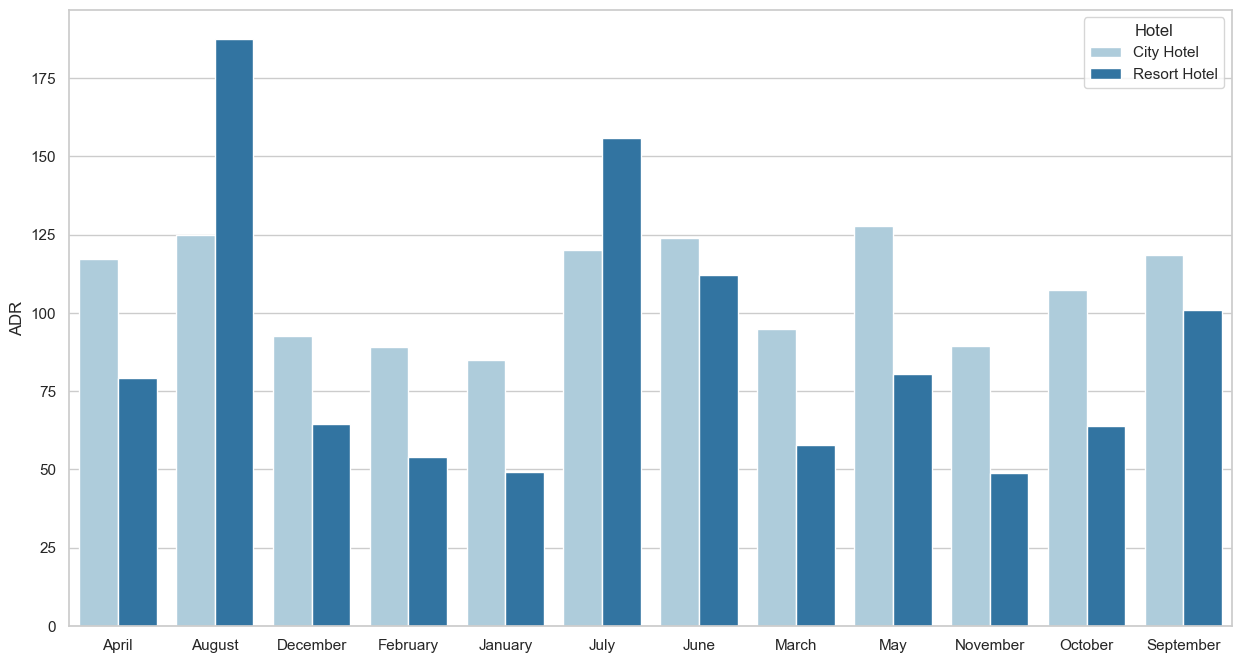

In [21]:
result = hotel_df.groupby(['hotel','arrival_date_month'])['adr'].mean().reset_index()

plt.figure(figsize=(15,8))
sns.set_theme(style="whitegrid", color_codes=True)
sns.barplot(x=result['arrival_date_month'],y=result['adr'],hue=result['hotel'],palette='Paired')
plt.xlabel('')
plt.ylabel('ADR')
plt.legend(title='Hotel');

The above chart shows the ADR values for different months and types of hotels. The results show that the value of the parameter is higher in most months of the year for City Hotel. ADR values are higher for Resort Hotel than City Hotel only in July and August.

<h3><font color='yellow'>Q6: Check hotel wise daily rates mean, standard deviation, median, min and max.</font></h3>

In [22]:
hotel_df.groupby('hotel')['adr'].agg(['mean','max','min','std','median','skew']).reset_index()

C:\Users\Mohammad\AppData\Local\Temp\ipykernel_15516\3113995121.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  hotel_df.groupby('hotel')['adr'].agg(['mean','max','min','std','median','skew']).reset_index()


,hotel,mean,max,min,std,median,skew
0,City Hotel,111.000010,5400.0,0.0,48.053339,105.3,25.394556
1,Resort Hotel,99.428811,508.0,0.0,63.706514,80.0,1.093652


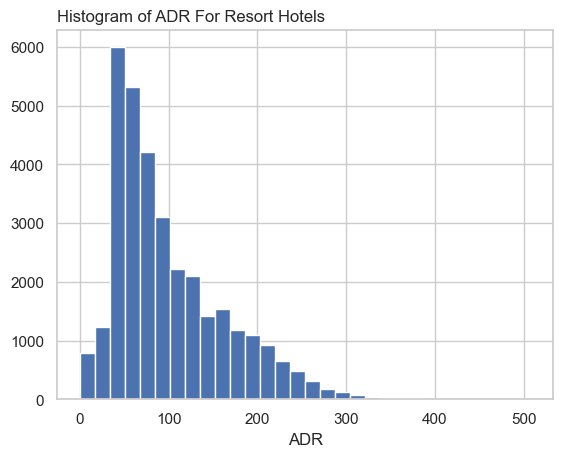

In [23]:
resort_hotel_adr = hotel_df[hotel_df['hotel'] == 'Resort Hotel']['adr']

plt.figure()
plt.hist(resort_hotel_adr,bins=30);
plt.xlabel('ADR');
plt.title('Histogram of ADR For Resort Hotels',loc='left');

As can be seen in the above table, the average value of ADR for City Hotel is higher than Resort Hotel. On the other hand, the lower standard deviation value of the ADR parameter for City Hotels compared to Resort Hotels indicates a smaller difference in the values of this parameter compared to the average in City Hotels. In fact, it is expected that the ADR values of City Hotels have less difference compared to Resort Hotels. Taking into account the maximum value, we realize the difference of about 10 times the ADR value in City Hotels compared to Resort Hotel. The value of skew for Resort Hotels is much lower than that of City Hotels and is almost equal to one, while this parameter shows a value of 25 for City Hotels.

<h3><font color='yellow'>Q7: Extract the number of bookings per country and investigate that most of the guests are from which countries?</font></h3>

C:\Users\Mohammad\AppData\Local\Temp\ipykernel_15516\1803973962.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  result = hotel_df.groupby('country')['hotel'].count().reset_index()


,country,n_booking,name,alpha-2,alpha-3,country-code,iso_3166-2,region,sub-region,intermediate-region,region-code,sub-region-code,intermediate-region-code
135,PRT,27181,Portugal,PT,PRT,620.0,ISO 3166-2:PT,Europe,Southern Europe,NaN,150.0,39.0,NaN
59,GBR,10415,United Kingdom of Great Britain and Northern I...,GB,GBR,826.0,ISO 3166-2:GB,Europe,Northern Europe,NaN,150.0,154.0,NaN
56,FRA,8768,France,FR,FRA,250.0,ISO 3166-2:FR,Europe,Western Europe,NaN,150.0,155.0,NaN
51,ESP,7162,Spain,ES,ESP,724.0,ISO 3166-2:ES,Europe,Southern Europe,NaN,150.0,39.0,NaN
43,DEU,5386,Germany,DE,DEU,276.0,ISO 3166-2:DE,Europe,Western Europe,NaN,150.0,155.0,NaN
81,ITA,3063,Italy,IT,ITA,380.0,ISO 3166-2:IT,Europe,Southern Europe,NaN,150.0,39.0,NaN
76,IRL,3015,Ireland,IE,IRL,372.0,ISO 3166-2:IE,Europe,Northern Europe,NaN,150.0,154.0,NaN
15,BEL,2080,Belgium,BE,BEL,56.0,ISO 3166-2:BE,Europe,Western Europe,NaN,150.0,155.0,NaN
25,BRA,1993,Brazil,BR,BRA,76.0,ISO 3166-2:BR,Americas,Latin America and the Caribbean,South America,19.0,419.0,5.0
123,NLD,1911,Netherlands,NL,NLD,528.0,ISO 3166-2:NL,Europe,Western Europe,NaN,150.0,155.0,NaN


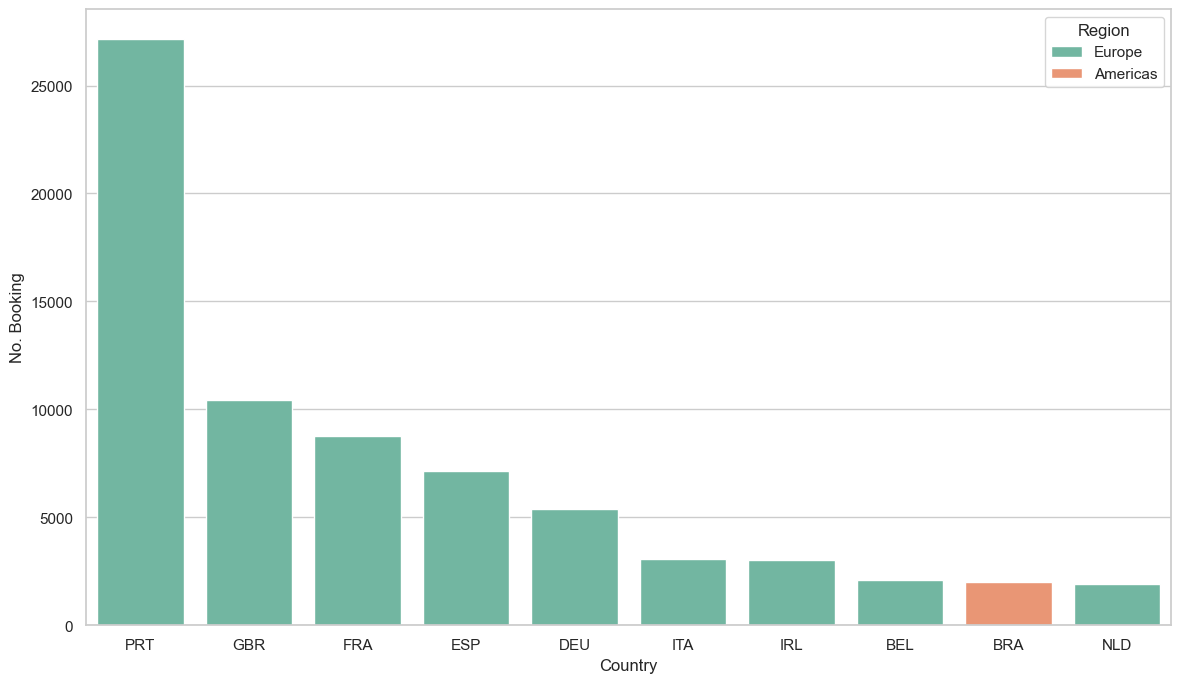

In [24]:
result = hotel_df.groupby('country')['hotel'].count().reset_index()
result.rename(columns={'hotel': 'n_booking'}, inplace=True)

country3letters = pd.read_csv('country.csv')

n_book_country = pd.merge(result, country3letters, left_on='country', right_on='alpha-3',how='left')
n_book_country = n_book_country.sort_values('n_booking',ascending=False).head(10)

plt.figure(figsize=(14,8))
sns.barplot(x=n_book_country['country'],y=n_book_country['n_booking'],hue=n_book_country['region'],palette='Set2')
plt.xlabel('Country')
plt.ylabel('No. Booking')
plt.legend(title='Region')
n_book_country

As can be seen in the above graph, Portuguese passengers had the highest number of reservations. On the other hand, among the 10 countries that had the highest number of reservations, only one country (Brazil) is from a different continent. In fact, most of these countries are from the European continent.

<h3><font color='yellow'>Q8: According to the ‘market_segment’ most of the guests book their rooms on what channels?</font></h3>

<ul>
<h3>Definitions:</h3>
    <li><b>Hotel Market Segmentation</b>: Hotel market segmentation is the process of grouping hotel guests into categories based on their booking patterns and travel habits. By segmenting hotel guests into market groups, hoteliers are able to identify where their business is coming from, spot new business in the area, and drive hotel revenue.
        <ul>
            <li><b>Online Travel Agents (Online TA)</b>: Online travel agents are websites or platforms that allow customers to book hotel rooms and travel services online. Hotels often partner with online travel agents to reach a wider audience and increase their online visibility.</li>
            <li><b>Offline Travel Agents / Tour Operators (Offline TA/TO)</b>: Offline travel agents and tour operators are traditional brick-and-mortar agencies that help customers book travel services. Hotels may work with offline travel agents to attract customers who prefer booking through traditional channels.</li>
            <li><b>Direct Market Segment</b>: Direct market segment refers to customers who book hotel rooms directly through the hotel's website, phone reservations, or walk-in bookings. Hotels often target this segment by offering special discounts or loyalty programs to encourage direct bookings.</li>
            <li><b>Groups</b>: The groups market segment includes bookings made by large groups such as tour groups, corporate groups, or event attendees. Hotels may offer special group rates or packages to attract group bookings.</li>
            <li><b>Complementary Market Segment</b>: The complementary market segment includes partnerships with other businesses or organizations to offer bundled services or packages. For example, a hotel may partner with a spa or restaurant to offer a combined stay-and-dine package.</li>
            <li><b>Aviation Market Segment</b>: The aviation market segment includes bookings made by airline crew members, pilots, or passengers with layovers or flight delays. Hotels near airports often target this segment by offering convenient accommodations and shuttle services.</li>
        </ul>
    </li>
    <li><b>Distribution Channel</b>: Distribution channel in the hotel industry refers to the various ways in which hotels distribute their rooms and services to customers. This can include direct bookings through the hotel's website or reservations made through online travel agencies (OTAs).
        <ul>
            <li><b>Travel Agents (TA) / Tour Operators (TO)</b>: Travel agents and tour operators are intermediaries that help customers book hotel rooms and travel packages. Hotels often work with travel agents and tour operators to reach a wider audience and attract more bookings.</li>
            <li><b>Direct Distribution</b>: Direct distribution channels refer to bookings made directly through the hotel's website, phone reservations, or walk-in bookings. Hotels often encourage direct bookings by offering special discounts or perks to customers who book directly.</li>
            <li><b>Corporate Distribution</b>: Corporate distribution channels involve partnerships with corporate clients or companies that regularly book hotel rooms for their employees. Hotels may offer corporate rates or special packages to attract business travelers.</li>
            <li><b>Global Distribution Systems (GDS)</b>: GDS are computerized systems used by travel agents and online booking platforms to access and book hotel rooms, flights, and other travel services. Hotels can connect to GDS to reach a larger audience of travel agents and customers worldwide.</li>
        </ul>
    </li>
</ul>

C:\Users\Mohammad\AppData\Local\Temp\ipykernel_15516\1618806437.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  result = hotel_df.groupby(['market_segment','distribution_channel'])['hotel'].count().reset_index()


,market_segment,distribution_channel,count
27,Online TA,TA/TO,51228
23,Offline TA/TO,TA/TO,13537
13,Direct,Direct,11276
8,Corporate,Corporate,3728
19,Groups,TA/TO,3484
16,Groups,Corporate,659
17,Groups,Direct,569
5,Complementary,Direct,542
15,Direct,TA/TO,223
0,Aviation,Corporate,217


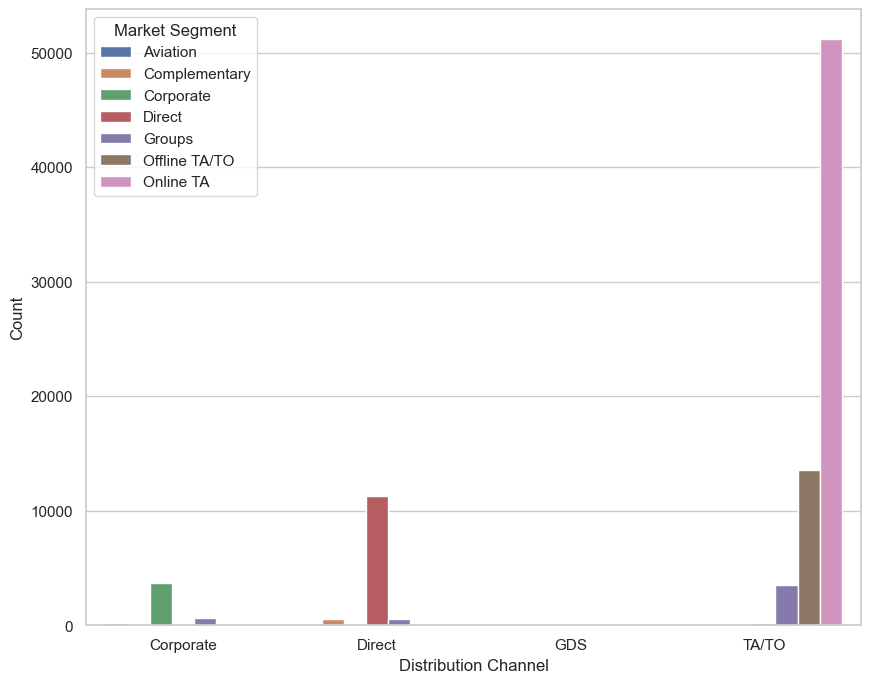

In [25]:
result = hotel_df.groupby(['market_segment','distribution_channel'])['hotel'].count().reset_index()
result.rename(columns={'hotel':'count'},inplace=True)
result = result.sort_values('count',ascending=False)

plt.figure(figsize=(10,8))
sns.barplot(x=result['distribution_channel'],y=result['count'],hue=result['market_segment'])
plt.xlabel('Distribution Channel')
plt.ylabel('Count')
plt.legend(title='Market Segment')
result

The above diagram shows that hotels use four methods to announce their services. Travelers often prefer to make their hotel reservations through Online TA. As mentioned above, hotels also usually cooperate with Online Travel Agents (Online TA). Therefore, hotel reservations by travelers can be expected through the mentioned method.

<h3><font color='yellow'>Q9: The correlation between the number of guests and the ADR parameter</font></h3>

In [26]:
hotel_df['people'] = hotel_df.loc[:,'adults':'babies'].sum(axis=1)

plt.figure()
plt.plot(hotel_df['adr'],hotel_df['people'],'bo')
plt.yscale('log')
plt.xscale('log')
plt.title(f'R = {np.corrcoef(hotel_df['adr'],hotel_df['people'])[1,0]: .4f}');
plt.xlabel('ADR')
plt.ylabel('No. Guests')

SyntaxError: f-string: unmatched '[' (2974976927.py, line 7)

Based on the Pearson correlation coefficient and also the above graph, it can be seen that there is a relatively good linear relationship between the number of passengers and the adr parameter. In fact, with the increase in the number of passengers, the value of ADR also increases slightly.

<h3><font color='yellow'>Q10: Distribution of meals according to region.</font></h3>

<ul>
<h3>Definitions: Types of food in hotels</h3>
    <li><b>RO (Room Only)</b>: The "Room Only" format does not initially include meals. This accommodation option is cheaper, guests are not tied to a meal schedule, they can taste a variety of local dishes at their own discretion and at a more preferable time. Sometimes instead of RO (OR) you can see other designations - EP (European Plan), BO (Bed Only), AO (Accommodation Only), RR (Room Rate), NO (simply "no"). All of them indicate the absence of meals.</li>
    <li><b>BB (Bed and Breakfast)</b>: This is the perfect option for those who want to make the most of their time exploring sights, trips out of town, and excursions. The hotel will offer a light or full breakfast in a self-service format. This type of meal is common in budget hotels, and many people prefer it.</li>
    <li><b>HB (Half Board)</b>: This type of meal is often referred to as half board or demi-pension. Most often it's breakfast and dinner, less often - breakfast and lunch. The first option is preferable as it gives the guest a relatively free day, without extra worry about missing lunch.</li>
    <li><b>FB (Full Board)</b>: The price per night in a hotel with FB (Full Board) meal type includes three meals sometimes in the kitchen, but more often - in the hotel or inn's dining hall. Food is served at a certain time, and no snacks are provided between breakfasts, lunches and dinners. Additional costs may include mandatory tips, which should be taken into account when planning a trip. An advantage of staying on an FB meal plan is the lack of worry about finding suitable places for breakfasts, lunches and dinners. Other designations for FB are often encountered - these are FP (Full Pension) and AP (American Plan).</li>
    <li><b>SC (Self-catering)</b>: Self-catering in a hotel typically means that guests have the option to prepare their own meals in a kitchen or kitchenette within their hotel room or suite. This can be a convenient option for those who prefer to cook their own meals or have dietary restrictions.</li>
</ul>

C:\Users\Mohammad\AppData\Local\Temp\ipykernel_17480\4142046990.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  result = result.groupby(['meal','region'])['hotel'].count().reset_index()


,meal,region,count
0,BB,Africa,779
1,BB,Americas,3398
2,BB,Asia,1941
3,BB,Europe,60242
4,BB,Oceania,334
5,FB,Africa,2
6,FB,Americas,3
7,FB,Asia,0
8,FB,Europe,353
9,FB,Oceania,0


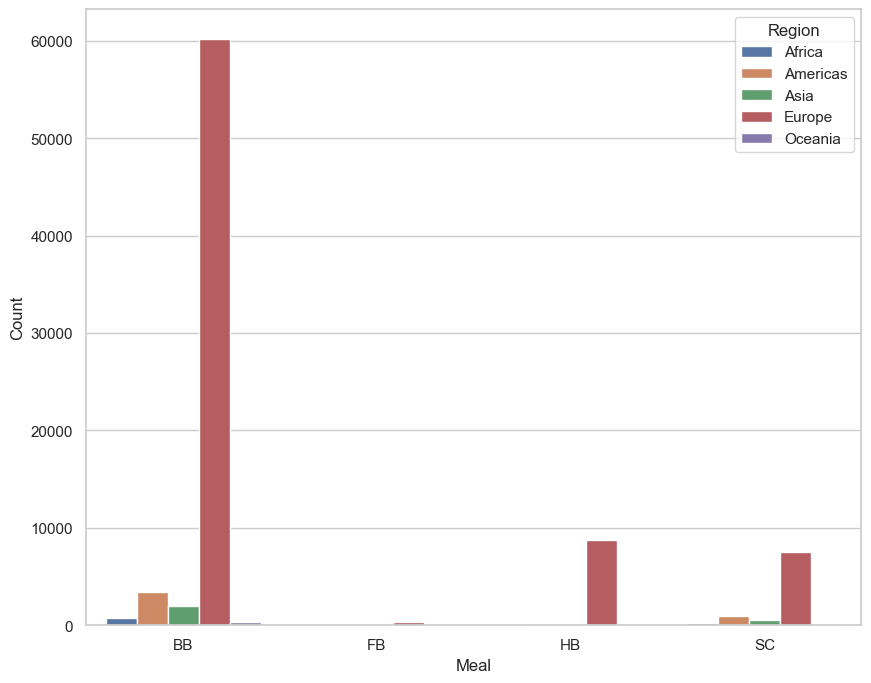

In [ ]:
country3letters = pd.read_csv('country.csv')
result = pd.merge(hotel_df, country3letters, left_on='country', right_on='alpha-3')

result = result.groupby(['meal','region'])['hotel'].count().reset_index()
result.rename(columns={'hotel':'count'},inplace=True)

plt.figure(figsize=(10,8))
sns.barplot(x=result['meal'],y=result['count'],hue=result['region'])
plt.xlabel('Meal')
plt.ylabel('Count')
plt.legend(title='Region')
result

Based on the results obtained, most of the people who live in different regions of the world tend to book their hotels as Bed and Breakfast (BB), among which people from European countries have the highest number of hotel reservations.